In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import drive
from google.colab import files

In [3]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


### Demographic Data

In [4]:
demo15_16 = pd.read_sas('/content/drive/My Drive/PJ_OB/Data/2015_16/DEMO_I.XPT')

In [5]:
demo17_20 = pd.read_sas('/content/drive/My Drive/PJ_OB/Data/2017_20/P_DEMO.XPT')

In [6]:
demo15_16_cols = demo15_16[['SEQN','RIAGENDR','RIDAGEYR','RIDRETH3','DMDEDUC2','DMDMARTL']]

In [7]:
demo15_16_cols['DMDMARTL'].replace({1:1, 6:1,
                                    2:2, 3:2,
                                    4:2, 5:3},inplace=True)

<ipython-input-7-9ab8dbc1febd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo15_16_cols['DMDMARTL'].replace({1:1, 6:1,


In [8]:
demo15_16_cols = demo15_16_cols.rename(columns={"DMDMARTL": "DMDMARTZ"})

In [9]:
demo15_16_cols

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH3,DMDEDUC2,DMDMARTZ
0,83732.0,1.0,62.0,3.0,5.0,1.0
1,83733.0,1.0,53.0,3.0,3.0,2.0
2,83734.0,1.0,78.0,3.0,3.0,1.0
3,83735.0,2.0,56.0,3.0,5.0,1.0
4,83736.0,2.0,42.0,4.0,4.0,2.0
...,...,...,...,...,...,...
9966,93698.0,1.0,2.0,1.0,NaN,NaN
9967,93699.0,2.0,6.0,4.0,NaN,NaN
9968,93700.0,1.0,35.0,3.0,1.0,1.0
9969,93701.0,1.0,8.0,3.0,NaN,NaN


In [10]:
demo15_16_cols['DMDMARTZ'].value_counts()

1.0     3441
2.0     1227
3.0     1048
77.0       2
99.0       1
Name: DMDMARTZ, dtype: int64

In [11]:
#demo15_16_cols['SEQN'].nunique()

In [12]:
demo17_20_cols = demo17_20[['SEQN','RIAGENDR','RIDAGEYR','RIDRETH3','DMDEDUC2','DMDMARTZ']]

In [13]:
demo17_20_cols['DMDMARTZ'].value_counts()

1.0     5279
2.0     2148
3.0     1795
77.0       8
99.0       2
Name: DMDMARTZ, dtype: int64

In [14]:
demo17_20_cols.tail()

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH3,DMDEDUC2,DMDMARTZ
15555,124818.0,1.0,40.0,4.0,5.0,1.0
15556,124819.0,1.0,2.0,4.0,NaN,NaN
15557,124820.0,2.0,7.0,3.0,NaN,NaN
15558,124821.0,1.0,63.0,4.0,2.0,2.0
15559,124822.0,1.0,74.0,2.0,3.0,1.0


#### Here we get the compiled demographic dataset with selected features only

In [15]:
df_demo = pd.concat([demo15_16_cols,demo17_20_cols],ignore_index=True)

In [16]:
df_demo.shape

(25531, 6)

In [17]:
df_demo.head()

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH3,DMDEDUC2,DMDMARTZ
0,83732.0,1.0,62.0,3.0,5.0,1.0
1,83733.0,1.0,53.0,3.0,3.0,2.0
2,83734.0,1.0,78.0,3.0,3.0,1.0
3,83735.0,2.0,56.0,3.0,5.0,1.0
4,83736.0,2.0,42.0,4.0,4.0,2.0


In [18]:
df_demo.tail()

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH3,DMDEDUC2,DMDMARTZ
25526,124818.0,1.0,40.0,4.0,5.0,1.0
25527,124819.0,1.0,2.0,4.0,NaN,NaN
25528,124820.0,2.0,7.0,3.0,NaN,NaN
25529,124821.0,1.0,63.0,4.0,2.0,2.0
25530,124822.0,1.0,74.0,2.0,3.0,1.0


In [19]:
df_demo[df_demo.duplicated()] #no duplication

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH3,DMDEDUC2,DMDMARTZ


### Diet Behavior and Nutrition Data

Variable taken: Number of ready-to-eat foods in past 30 days

In [20]:
#diet15_16 = pd.read_sas('/content/drive/My Drive/Project_Obesity/Data/2015_16/DBQ_I.XPT')
diet15_16 = pd.read_sas('/content/drive/My Drive/PJ_OB/Data/2015_16/DBQ_I.XPT')

In [21]:
#diet17_20 = pd.read_sas('/content/drive/My Drive/Project_Obesity/Data/2017_20/P_DBQ.XPT')
diet17_20 = pd.read_sas('/content/drive/My Drive/PJ_OB/Data/2017_20/P_DBQ.XPT')

In [22]:
#df_diet = pd.concat([diet11_12,diet13_14,diet15_16,diet17_20],ignore_index=True)
df_diet = pd.concat([diet15_16,diet17_20],ignore_index=True)

In [23]:
df_diet = df_diet[['SEQN','DBD905']]

In [24]:
df_diet['DBD905'] = df_diet['DBD905'].round(2)

In [25]:
df_diet

,SEQN,DBD905
0,83732.0,2.0
1,83733.0,0.0
2,83734.0,0.0
3,83735.0,11.0
4,83736.0,3.0
...,...,...
25526,124818.0,5.0
25527,124819.0,0.0
25528,124820.0,0.0
25529,124821.0,0.0


In [26]:
df_diet['DBD905'].value_counts()

0.0       15726
1.0        2114
2.0        1875
4.0         947
3.0         945
5.0         605
8.0         410
10.0        362
12.0        205
6.0         172
15.0        158
30.0        155
7.0         149
20.0        120
17.0         77
9999.0       76
21.0         51
60.0         41
25.0         27
90.0         22
14.0         21
6666.0       14
9.0          10
42.0          9
16.0          9
11.0          6
34.0          4
13.0          4
23.0          3
22.0          2
28.0          2
45.0          2
51.0          2
19.0          2
18.0          2
26.0          2
27.0          2
85.0          1
70.0          1
48.0          1
54.0          1
24.0          1
7777.0        1
38.0          1
40.0          1
Name: DBD905, dtype: int64

In [27]:
# Drop 7777 and 9999 before recategorization

In [28]:
#df_diet = df_diet[df_diet['DBD905'] != 7777.0]
#df_diet

In [29]:
#df_diet = df_diet[df_diet['DBD905'] != 9999.0]
#df_diet['DBD905'].value_counts()

Categorize this to three levels: 0, 1 to 2, More than 2

In [30]:
#def meals_cat(y):
  #if y == 0:
    #return "None"
  #elif 1 <= y <= 30.0:
    #return "1 each day"
  #elif y > 60:
    #return "More than 1 each day"

In [31]:
#df_diet['Meals_Cat'] = df_diet.apply(lambda x: meals_cat(x['DBD905']),axis=1)

In [32]:
#df_diet['Meals_Cat'].value_counts(normalize=True)

### Physical Activity Data

Variable taken: moderate work activity

In [33]:
#physical15_16 = pd.read_sas('/content/drive/My Drive/Project_Obesity/Data/2015_16/PAQ_I.XPT')
physical15_16 = pd.read_sas('/content/drive/My Drive/PJ_OB/Data/2015_16/PAQ_I.XPT')

In [34]:
#physical17_20 = pd.read_sas('/content/drive/My Drive/Project_Obesity/Data/2017_20/P_PAQ.XPT')
physical17_20 = pd.read_sas('/content/drive/My Drive/PJ_OB/Data/2017_20/P_PAQ.XPT')

In [35]:
df_physical = pd.concat([physical15_16,physical17_20],ignore_index=True)

In [36]:
df_physical = df_physical[['SEQN','PAQ620']]

In [37]:
df_physical

,SEQN,PAQ620
0,83732.0,1.0
1,83733.0,2.0
2,83734.0,1.0
3,83735.0,1.0
4,83736.0,1.0
...,...,...
18943,124815.0,2.0
18944,124817.0,2.0
18945,124818.0,2.0
18946,124821.0,2.0


In [38]:
df_physical['PAQ620'].value_counts()

2.0    9860
1.0    6785
9.0      13
Name: PAQ620, dtype: int64

### Smoking

Variable taken: smoked at least 100 cigarettes in life

In [39]:
#smk15_16 = pd.read_sas('/content/drive/My Drive/Project_Obesity/Data/2015_16/SMQ_I.XPT')
smk15_16 = pd.read_sas('/content/drive/My Drive/PJ_OB/Data/2015_16/SMQ_I.XPT')

In [40]:
#smk17_20 = pd.read_sas('/content/drive/My Drive/Project_Obesity/Data/2017_20/P_SMQ.XPT')
smk17_20 = pd.read_sas('/content/drive/My Drive/PJ_OB/Data/2017_20/P_SMQ.XPT')

In [41]:
df_smk = pd.concat([smk15_16,smk17_20],ignore_index=True)

In [42]:
df_smk = df_smk[['SEQN','SMQ020']]

In [43]:
df_smk

,SEQN,SMQ020
0,83732.0,1.0
1,83733.0,1.0
2,83734.0,1.0
3,83735.0,2.0
4,83736.0,2.0
...,...,...
18133,124815.0,1.0
18134,124817.0,2.0
18135,124818.0,2.0
18136,124821.0,2.0


In [44]:
df_smk['SMQ020'].value_counts()

2.0    9358
1.0    6311
9.0      12
7.0       4
Name: SMQ020, dtype: int64

### Sleep Disorder

Variable taken: Ever told doctor had trouble sleeping

In [45]:
#slp15_16 = pd.read_sas('/content/drive/My Drive/Project_Obesity/Data/2015_16/SLQ_I.XPT')
slp15_16 = pd.read_sas('/content/drive/My Drive/PJ_OB/Data/2015_16/SLQ_I.XPT')

In [46]:
#slp17_20 = pd.read_sas('/content/drive/My Drive/Project_Obesity/Data/2017_20/P_SLQ.XPT')
slp17_20 = pd.read_sas('/content/drive/My Drive/PJ_OB/Data/2017_20/P_SLQ.XPT')

In [47]:
df_slp = pd.concat([slp15_16,slp17_20],ignore_index=True)

In [48]:
df_slp = df_slp[['SEQN','SLQ050']]

In [49]:
df_slp

,SEQN,SLQ050
0,83732.0,1.0
1,83733.0,2.0
2,83734.0,2.0
3,83735.0,1.0
4,83736.0,1.0
...,...,...
16517,124815.0,2.0
16518,124817.0,2.0
16519,124818.0,2.0
16520,124821.0,2.0


In [50]:
df_slp['SLQ050'].value_counts()

2.0    12143
1.0     4367
9.0       10
7.0        2
Name: SLQ050, dtype: int64

### Mental Health Depression Screener

Variable taken: Poor appetite or overeating

In [51]:
#mh15_16 = pd.read_sas('/content/drive/My Drive/Project_Obesity/Data/2015_16/DPQ_I.XPT')
mh15_16 = pd.read_sas('/content/drive/My Drive/PJ_OB/Data/2015_16/DPQ_I.XPT')

In [52]:
#mh17_20 = pd.read_sas('/content/drive/My Drive/Project_Obesity/Data/2017_20/P_DPQ.XPT')
mh17_20 = pd.read_sas('/content/drive/My Drive/PJ_OB/Data/2017_20/P_DPQ.XPT')

In [53]:
df_mh = pd.concat([mh15_16,mh17_20],ignore_index=True)

In [54]:
df_mh = df_mh[['SEQN','DPQ050']]

In [55]:
df_mh['DPQ050'] = df_mh['DPQ050'].round(2)

<ipython-input-55-42a5153ef038>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mh['DPQ050'] = df_mh['DPQ050'].round(2)


In [56]:
df_mh

,SEQN,DPQ050
0,83732.0,0.0
1,83733.0,1.0
2,83734.0,0.0
3,83735.0,1.0
4,83736.0,3.0
...,...,...
14695,124815.0,0.0
14696,124817.0,0.0
14697,124818.0,0.0
14698,124821.0,0.0


In [57]:
df_mh['DPQ050'].value_counts()

0.0    9975
1.0    2160
2.0     707
3.0     615
9.0       8
7.0       2
Name: DPQ050, dtype: int64

### Health Insurance

Variable taken: Covered by health insurance

In [58]:
#hi15_16 = pd.read_sas('/content/drive/My Drive/Project_Obesity/Data/2015_16/HIQ_I.XPT')
hi15_16 = pd.read_sas('/content/drive/My Drive/PJ_OB/Data/2015_16/HIQ_I.XPT')

In [59]:
#hi17_20 = pd.read_sas('/content/drive/My Drive/Project_Obesity/Data/2017_20/P_HIQ.XPT')
hi17_20 = pd.read_sas('/content/drive/My Drive/PJ_OB/Data/2017_20/P_HIQ.XPT')

In [60]:
df_hi = pd.concat([hi15_16,hi17_20],ignore_index=True)

In [61]:
df_hi = df_hi[['SEQN','HIQ011']]

In [62]:
df_hi

,SEQN,HIQ011
0,83732.0,1.0
1,83733.0,2.0
2,83734.0,1.0
3,83735.0,1.0
4,83736.0,1.0
...,...,...
25526,124818.0,1.0
25527,124819.0,1.0
25528,124820.0,1.0
25529,124821.0,2.0


In [63]:
df_hi['HIQ011'].value_counts()

1.0    22311
2.0     3164
9.0       44
7.0       12
Name: HIQ011, dtype: int64

### Alcohol Intake

Variable taken: Ever have 4/5 or more drinks every day?

In [64]:
#ai15_16 = pd.read_sas('/content/drive/My Drive/Project_Obesity/Data/2015_16/ALQ_I.XPT')
ai15_16 = pd.read_sas('/content/drive/My Drive/PJ_OB/Data/2015_16/ALQ_I.XPT')

In [65]:
#ai17_20 = pd.read_sas('/content/drive/My Drive/Project_Obesity/Data/2017_20/P_ALQ.XPT')
ai17_20 = pd.read_sas('/content/drive/My Drive/PJ_OB/Data/2017_20/P_ALQ.XPT')

In [66]:
df_ai = pd.concat([ai15_16,ai17_20],ignore_index=True)

In [67]:
df_ai = df_ai[['SEQN','ALQ151']]

In [68]:
df_ai

,SEQN,ALQ151
0,83732.0,2.0
1,83733.0,1.0
2,83734.0,1.0
3,83735.0,2.0
4,83736.0,2.0
...,...,...
14695,124815.0,2.0
14696,124817.0,2.0
14697,124818.0,2.0
14698,124821.0,2.0


In [69]:
df_ai['ALQ151'].value_counts()

2.0    9861
1.0    1850
9.0      10
7.0       2
Name: ALQ151, dtype: int64

### Body Mass Index

Variable taken: Body mass index measure

In [70]:
#bmi15_16 = pd.read_sas('/content/drive/My Drive/Project_Obesity/Data/2015_16/BMX_I.XPT')
bmi15_16 = pd.read_sas('/content/drive/My Drive/PJ_OB/Data/2015_16/BMX_I.XPT')

In [71]:
#bmi17_20 = pd.read_sas('/content/drive/My Drive/Project_Obesity/Data/2017_20/P_BMX.XPT')
bmi17_20 = pd.read_sas('/content/drive/My Drive/PJ_OB/Data/2017_20/P_BMX.XPT')

In [72]:
df_bmi = pd.concat([bmi15_16,bmi17_20],ignore_index=True)

In [73]:
df_bmi = df_bmi[['SEQN','BMXBMI']]

In [74]:
df_bmi

,SEQN,BMXBMI
0,83732.0,27.8
1,83733.0,30.8
2,83734.0,28.8
3,83735.0,42.4
4,83736.0,20.3
...,...,...
23839,124818.0,38.2
23840,124819.0,17.5
23841,124820.0,15.1
23842,124821.0,25.5


### A look at all datasets

In [75]:
df_demo.shape

(25531, 6)

In [76]:
df_diet.shape

(25531, 2)

In [77]:
df_physical.shape

(18948, 2)

In [78]:
df_smk.shape

(18138, 2)

In [79]:
df_slp.shape

(16522, 2)

In [80]:
df_mh.shape

(14700, 2)

In [81]:
df_ai.shape

(14700, 2)

In [82]:
df_hi.shape

(25531, 2)

In [83]:
df_bmi.shape

(23844, 2)

### MERGE DATASETS

In [84]:
from functools import reduce

In [85]:
#define list of DataFrames
dfs = [df_demo, df_diet, df_physical,df_smk,df_slp,df_mh,df_ai,df_hi,df_bmi]

In [86]:
#merge all DataFrames into one
df = reduce(lambda  left,right: pd.merge(left,right,on=['SEQN'],
                                            how='inner'), dfs)

In [87]:
print(df)

           SEQN  RIAGENDR  RIDAGEYR  RIDRETH3  DMDEDUC2  DMDMARTZ  DBD905  \
0       83732.0       1.0      62.0       3.0       5.0       1.0     2.0   
1       83733.0       1.0      53.0       3.0       3.0       2.0     0.0   
2       83734.0       1.0      78.0       3.0       3.0       1.0     0.0   
3       83735.0       2.0      56.0       3.0       5.0       1.0    11.0   
4       83736.0       2.0      42.0       4.0       4.0       2.0     3.0   
...         ...       ...       ...       ...       ...       ...     ...   
14695  124815.0       1.0      52.0       4.0       4.0       2.0     0.0   
14696  124817.0       2.0      67.0       1.0       2.0       1.0     0.0   
14697  124818.0       1.0      40.0       4.0       5.0       1.0     5.0   
14698  124821.0       1.0      63.0       4.0       2.0       2.0     0.0   
14699  124822.0       1.0      74.0       2.0       3.0       1.0     0.0   

       PAQ620  SMQ020  SLQ050  DPQ050  ALQ151  HIQ011  BMXBMI  
0         1

In [88]:
### REMOVE DUPLICATES

In [89]:
len(df)-len(df.drop_duplicates())

0

In [90]:
df = df.rename(columns={"RIAGENDR": "Gender", "RIDAGEYR": "Age","RIDRETH3":"Race",
                   "DMDEDUC2":"Education","DMDMARTZ":"Marital Status","DBD905":"Ready to eat meals",
                   "SMQ020":"Smoked 100 cigarettes",
                   "SLQ050":"Trouble Sleeping","PAQ620":"Moderate Work Activity",
                    "DPQ050":"Poor apetite or over eating",
                    "ALQ151":"Alcohol use",
                    "HIQ011":"Health Insurance",
                    "BMXBMI":"Body Mass Index"})

In [91]:
df

,SEQN,Gender,Age,Race,Education,Marital Status,Ready to eat meals,Moderate Work Activity,Smoked 100 cigarettes,Trouble Sleeping,Poor apetite or over eating,Alcohol use,Health Insurance,Body Mass Index
0,83732.0,1.0,62.0,3.0,5.0,1.0,2.0,1.0,1.0,1.0,0.0,2.0,1.0,27.8
1,83733.0,1.0,53.0,3.0,3.0,2.0,0.0,2.0,1.0,2.0,1.0,1.0,2.0,30.8
2,83734.0,1.0,78.0,3.0,3.0,1.0,0.0,1.0,1.0,2.0,0.0,1.0,1.0,28.8
3,83735.0,2.0,56.0,3.0,5.0,1.0,11.0,1.0,2.0,1.0,1.0,2.0,1.0,42.4
4,83736.0,2.0,42.0,4.0,4.0,2.0,3.0,1.0,2.0,1.0,3.0,2.0,1.0,20.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14695,124815.0,1.0,52.0,4.0,4.0,2.0,0.0,2.0,1.0,2.0,0.0,2.0,1.0,29.5
14696,124817.0,2.0,67.0,1.0,2.0,1.0,0.0,2.0,2.0,2.0,0.0,2.0,1.0,37.9
14697,124818.0,1.0,40.0,4.0,5.0,1.0,5.0,2.0,2.0,2.0,0.0,2.0,1.0,38.2
14698,124821.0,1.0,63.0,4.0,2.0,2.0,0.0,2.0,2.0,2.0,0.0,2.0,2.0,25.5


##Select only those greater than 20 years of age

In [92]:
df = df[df['Age'] >= 20]
df

,SEQN,Gender,Age,Race,Education,Marital Status,Ready to eat meals,Moderate Work Activity,Smoked 100 cigarettes,Trouble Sleeping,Poor apetite or over eating,Alcohol use,Health Insurance,Body Mass Index
0,83732.0,1.0,62.0,3.0,5.0,1.0,2.0,1.0,1.0,1.0,0.0,2.0,1.0,27.8
1,83733.0,1.0,53.0,3.0,3.0,2.0,0.0,2.0,1.0,2.0,1.0,1.0,2.0,30.8
2,83734.0,1.0,78.0,3.0,3.0,1.0,0.0,1.0,1.0,2.0,0.0,1.0,1.0,28.8
3,83735.0,2.0,56.0,3.0,5.0,1.0,11.0,1.0,2.0,1.0,1.0,2.0,1.0,42.4
4,83736.0,2.0,42.0,4.0,4.0,2.0,3.0,1.0,2.0,1.0,3.0,2.0,1.0,20.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14695,124815.0,1.0,52.0,4.0,4.0,2.0,0.0,2.0,1.0,2.0,0.0,2.0,1.0,29.5
14696,124817.0,2.0,67.0,1.0,2.0,1.0,0.0,2.0,2.0,2.0,0.0,2.0,1.0,37.9
14697,124818.0,1.0,40.0,4.0,5.0,1.0,5.0,2.0,2.0,2.0,0.0,2.0,1.0,38.2
14698,124821.0,1.0,63.0,4.0,2.0,2.0,0.0,2.0,2.0,2.0,0.0,2.0,2.0,25.5


In [93]:
df['SEQN'].nunique()

14018

#### Distribution of BMI

In [94]:
df['Body Mass Index'].describe()

count    13787.000000
mean        29.844078
std          7.381659
min         14.200000
25%         24.700000
50%         28.700000
75%         33.500000
max         92.300000
Name: Body Mass Index, dtype: float64

In [95]:
# We will drop outliers
# IQR = Q3 - Q1
# +/- 1.5 IQR
## Get a plot of BMI to identify outliers

<Axes: xlabel='Body Mass Index'>

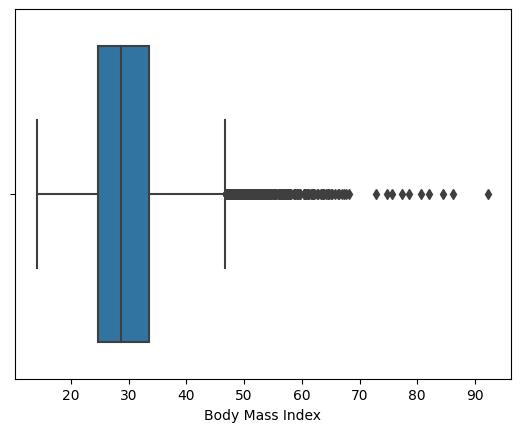

In [96]:
sns.boxplot(x=df["Body Mass Index"])

In [97]:
def outliers(df,ft):
  Q1 = df[ft].quantile(0.25)
  Q3 = df[ft].quantile(0.75)
  IQR = Q3-Q1

  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3 + 1.5*IQR
  ls = df.index[(df[ft] < lower_bound) | (df[ft]> upper_bound)]

  return ls

In [98]:
# create an empty list to store the output indices from multiple columns

index_list = []
for feature in ['Body Mass Index']:
  index_list.extend(outliers(df,feature))

In [99]:
#index_list

In [100]:
#df.iloc[26]

In [101]:
# define a function called "remove" which returns a cleaned dataframe without outliers

def remove(df, ls):
  ls = sorted(set(ls))
  df = df.drop(ls)
  return df

In [102]:
df = remove(df,index_list)

<Axes: xlabel='Body Mass Index'>

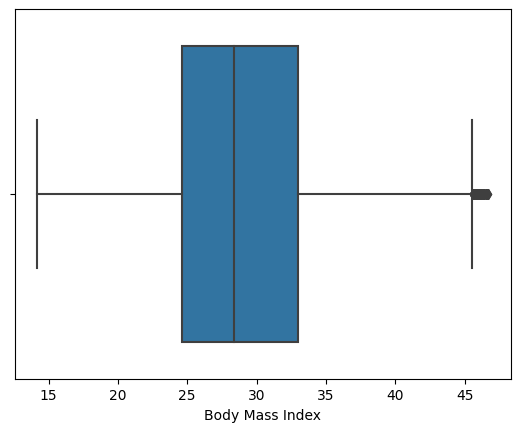

In [103]:
sns.boxplot(x=df["Body Mass Index"])

In [104]:
# create an empty list to store the output indices from multiple columns

#index_list = []
#for feature in ['Ready to eat meals']:
  #index_list.extend(outliers(df,feature))

In [105]:
#def remove(df, ls):
  #ls = sorted(set(ls))
  #df = df.drop(ls)
  #return df

In [106]:
#df = remove(df,index_list)

In [107]:
#df['Age'].describe()

In [108]:
# create an empty list to store the output indices from multiple columns

#index_list = []
#for feature in ['Age']:
  #index_list.extend(outliers(df,feature))

In [109]:
#def remove(df, ls):
  #ls = sorted(set(ls))
  #df = df.drop(ls)
  #return df

In [110]:
#df = remove(df,index_list)

In [111]:
df.isnull().mean()*100

SEQN                            0.000000
Gender                          0.000000
Age                             0.000000
Race                            0.000000
Education                       0.000000
Marital Status                  0.000000
Ready to eat meals              0.066181
Moderate Work Activity          0.000000
Smoked 100 cigarettes           0.000000
Trouble Sleeping                0.000000
Poor apetite or over eating     8.493272
Alcohol use                    19.302890
Health Insurance                0.000000
Body Mass Index                 1.698654
dtype: float64

In [112]:
df.shape

(13599, 14)

In [113]:
# Drop alcohol use column

In [114]:
df = df.drop(['Alcohol use'],axis=1)

In [115]:
df.shape

(13599, 13)

In [116]:
df.isnull().mean()*100

SEQN                           0.000000
Gender                         0.000000
Age                            0.000000
Race                           0.000000
Education                      0.000000
Marital Status                 0.000000
Ready to eat meals             0.066181
Moderate Work Activity         0.000000
Smoked 100 cigarettes          0.000000
Trouble Sleeping               0.000000
Poor apetite or over eating    8.493272
Health Insurance               0.000000
Body Mass Index                1.698654
dtype: float64

In [117]:
df = df.dropna(axis=0, how='any',inplace=False) # Drop rows with any missing value

In [118]:
df.shape

(12296, 13)

In [119]:
df.isnull().mean()*100

SEQN                           0.0
Gender                         0.0
Age                            0.0
Race                           0.0
Education                      0.0
Marital Status                 0.0
Ready to eat meals             0.0
Moderate Work Activity         0.0
Smoked 100 cigarettes          0.0
Trouble Sleeping               0.0
Poor apetite or over eating    0.0
Health Insurance               0.0
Body Mass Index                0.0
dtype: float64

### Give Labels

In [120]:
df['Gender'].replace({1:'Male',2:'Female'},inplace=True)
df['Race'].replace({1:'Mexican American',2:'Other Hispanic',
                    3:'Non-Hispanic White',4:'Non-Hispanic Black',
                    6:'Non-Hispanic Asian',7:'Other Race - Including Multi-Racial'}
                   ,inplace=True)
df['Education'].replace({1:'Less than 9th grade',2:'9-11th grade',3:'High school graduate',
                         4:'Some college',5:'College graduate',
                         7:'Refused',9:'Do not know'},inplace=True)
df['Marital Status'].replace({1:'Married/Living with Partner', 2:'Widowed/Divorced/Separated',3:'Never married',
                         77:'Refused',99:'Do not know'},inplace=True)
df['Moderate Work Activity'].replace({1:'Yes',2:'No',7:'Refused',9:'Do not know'},inplace=True)
df['Smoked 100 cigarettes'].replace({1:'Yes',2:'No',7:'Refused',9:'Do not know'},inplace=True)
df['Trouble Sleeping'].replace({1:'Yes',2:'No',7:'Refused',9:'Do not know'},inplace=True)
df['Poor apetite or over eating'].replace({0:'Not at all',1:'Several days',2:'More than half the days',
                                           3:'Nearly every day',7:'Refused',9:'Do not know'},inplace=True)
df['Health Insurance'].replace({1:'Yes',2:'No',7:'Refused',9:'Do not know'},inplace=True)

<ipython-input-120-7915354c6442>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'].replace({1:'Male',2:'Female'},inplace=True)
<ipython-input-120-7915354c6442>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Race'].replace({1:'Mexican American',2:'Other Hispanic',
<ipython-input-120-7915354c6442>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Education'].replace({1:'Less than 9th grade',2:'9-11th grade',3:'High s

In [121]:
df.describe()

,SEQN,Age,Ready to eat meals,Body Mass Index
count,12296.000000,12296.000000,12296.000000,12296.000000
mean,106194.658019,50.414932,25.771552,29.210695
std,14399.348275,17.574898,469.291840,6.154861
min,83732.000000,20.000000,0.000000,14.500000
25%,90145.500000,35.000000,0.000000,24.700000
50%,112272.000000,51.000000,0.000000,28.500000
75%,118602.250000,64.000000,2.000000,33.100000
max,124822.000000,80.000000,9999.000000,46.700000


*DROP DO NOT KNOW AND REFUSED RESPONSE CATEGORIES*

In [122]:
df['Gender'].value_counts(normalize=True)*100

Female    50.422902
Male      49.577098
Name: Gender, dtype: float64

In [123]:
df['Race'].value_counts(normalize=True)*100

Non-Hispanic White                     35.043917
Non-Hispanic Black                     23.845153
Mexican American                       13.923227
Other Hispanic                         11.459011
Non-Hispanic Asian                     11.345153
Other Race - Including Multi-Racial     4.383539
Name: Race, dtype: float64

In [124]:
# Recode Other Hispanic and Other Race to ----> Hispanic and Other

In [125]:
df['Race'].replace({'Other Hispanic':'Hispanic and Other',
                    'Other Race - Including Multi-Racial':'Hispanic and Other'},inplace=True)

In [126]:
df['Race'].value_counts(normalize=True)*100

Non-Hispanic White    35.043917
Non-Hispanic Black    23.845153
Hispanic and Other    15.842550
Mexican American      13.923227
Non-Hispanic Asian    11.345153
Name: Race, dtype: float64

In [127]:
df['Education'].value_counts(normalize=True)*100

Some college            31.538712
College graduate        25.260247
High school graduate    23.308393
9-11th grade            11.101171
Less than 9th grade      8.726415
Do not know              0.048796
Refused                  0.016265
Name: Education, dtype: float64

In [128]:
df = df.loc[(df['Education'] == 'Some college') | (df['Education'] =='College graduate') | (df['Education'] =='High school graduate') | (df['Education'] =='9-11th grade') | (df['Education'] =='Less than 9th grade')]

In [129]:
df['Education'].value_counts(normalize=True)*100

Some college            31.559245
College graduate        25.276693
High school graduate    23.323568
9-11th grade            11.108398
Less than 9th grade      8.732096
Name: Education, dtype: float64

In [130]:
df['Marital Status'].value_counts(normalize=True)*100

Married/Living with Partner    59.293620
Widowed/Divorced/Separated     21.875000
Never married                  18.790690
Refused                         0.032552
Do not know                     0.008138
Name: Marital Status, dtype: float64

In [131]:
df = df.loc[(df['Marital Status'] == 'Married/Living with Partner') | (df['Marital Status'] == 'Widowed/Divorced/Separated')  | (df['Marital Status'] == 'Never married') ]

In [132]:
df['Marital Status'].value_counts(normalize=True)*100

Married/Living with Partner    59.317756
Widowed/Divorced/Separated     21.883905
Never married                  18.798339
Name: Marital Status, dtype: float64

In [133]:
df['Moderate Work Activity'].value_counts(normalize=True)*100

No             57.616218
Yes            42.326793
Do not know     0.056989
Name: Moderate Work Activity, dtype: float64

In [134]:
df = df.loc[(df['Moderate Work Activity'] == 'Yes') | (df['Moderate Work Activity'] == 'No')]

In [135]:
df['Moderate Work Activity'].value_counts(normalize=True)*100

No     57.649071
Yes    42.350929
Name: Moderate Work Activity, dtype: float64

In [136]:
df['Smoked 100 cigarettes'].value_counts(normalize=True)*100

No             57.355816
Yes            42.562724
Do not know     0.057022
Refused         0.024438
Name: Smoked 100 cigarettes, dtype: float64

In [137]:
df = df.loc[(df['Smoked 100 cigarettes'] == 'Yes') | (df['Smoked 100 cigarettes'] == 'No')]

In [138]:
df['Smoked 100 cigarettes'].value_counts(normalize=True)*100

No     57.402576
Yes    42.597424
Name: Smoked 100 cigarettes, dtype: float64

In [139]:
df['Trouble Sleeping'].value_counts(normalize=True)*100

No             72.044676
Yes            27.914561
Do not know     0.040763
Name: Trouble Sleeping, dtype: float64

In [140]:
df = df.loc[(df['Trouble Sleeping'] == 'Yes') | (df['Trouble Sleeping'] == 'No')]

In [141]:
df['Trouble Sleeping'].value_counts(normalize=True)*100

No     72.074056
Yes    27.925944
Name: Trouble Sleeping, dtype: float64

In [142]:
df['Poor apetite or over eating'].value_counts(normalize=True)*100

Not at all                 74.904168
Several days               15.618628
More than half the days     5.072996
Nearly every day            4.338961
Do not know                 0.057092
Refused                     0.008156
Name: Poor apetite or over eating, dtype: float64

In [143]:
df = df.loc[(df['Poor apetite or over eating'] == 'Not at all') | (df['Poor apetite or over eating'] == 'Several days')|
            (df['Poor apetite or over eating'] == 'More than half the days') |
            (df['Poor apetite or over eating'] == 'Nearly every day')]

In [144]:
df['Poor apetite or over eating'].replace({'Nearly every day':'More than half the days'},inplace=True)

In [145]:
df['Poor apetite or over eating'].value_counts(normalize=True)*100

Not at all                 74.953073
Several days               15.628826
More than half the days     9.418102
Name: Poor apetite or over eating, dtype: float64

In [146]:
df['Health Insurance'].value_counts(normalize=True)*100

Yes            83.179629
No             16.640823
Do not know     0.138742
Refused         0.040806
Name: Health Insurance, dtype: float64

In [147]:
df = df.loc[(df['Health Insurance'] == 'Yes') | (df['Health Insurance'] == 'No')]

In [148]:
df['Health Insurance'].value_counts(normalize=True)*100

Yes    83.329245
No     16.670755
Name: Health Insurance, dtype: float64

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12231 entries, 0 to 14699
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SEQN                         12231 non-null  float64
 1   Gender                       12231 non-null  object 
 2   Age                          12231 non-null  float64
 3   Race                         12231 non-null  object 
 4   Education                    12231 non-null  object 
 5   Marital Status               12231 non-null  object 
 6   Ready to eat meals           12231 non-null  float64
 7   Moderate Work Activity       12231 non-null  object 
 8   Smoked 100 cigarettes        12231 non-null  object 
 9   Trouble Sleeping             12231 non-null  object 
 10  Poor apetite or over eating  12231 non-null  object 
 11  Health Insurance             12231 non-null  object 
 12  Body Mass Index              12231 non-null  float64
dtypes: float64(4), o

In [150]:
# Categorize Age

In [151]:
df['Age'].describe()

count    12231.000000
mean        50.386313
std         17.561316
min         20.000000
25%         35.000000
50%         51.000000
75%         64.000000
max         80.000000
Name: Age, dtype: float64

In [152]:
def age_cat(Age):
    if 20 <= Age < 31:
        return "20-30"
    elif 31 <= Age < 41:
        return "31-40"
    elif 41 <= Age < 51:
        return "41-50"
    elif 51 <= Age < 61:
        return "51-60"
    elif 61 <= Age < 71:
        return "61-70"
    else:
        return "More than 70"

In [153]:
df['Age_Cat'] = df.apply(lambda x: age_cat(x['Age']),axis=1)

In [154]:
df

,SEQN,Gender,Age,Race,Education,Marital Status,Ready to eat meals,Moderate Work Activity,Smoked 100 cigarettes,Trouble Sleeping,Poor apetite or over eating,Health Insurance,Body Mass Index,Age_Cat
0,83732.0,Male,62.0,Non-Hispanic White,College graduate,Married/Living with Partner,2.0,Yes,Yes,Yes,Not at all,Yes,27.8,61-70
1,83733.0,Male,53.0,Non-Hispanic White,High school graduate,Widowed/Divorced/Separated,0.0,No,Yes,No,Several days,No,30.8,51-60
2,83734.0,Male,78.0,Non-Hispanic White,High school graduate,Married/Living with Partner,0.0,Yes,Yes,No,Not at all,Yes,28.8,More than 70
3,83735.0,Female,56.0,Non-Hispanic White,College graduate,Married/Living with Partner,11.0,Yes,No,Yes,Several days,Yes,42.4,51-60
4,83736.0,Female,42.0,Non-Hispanic Black,Some college,Widowed/Divorced/Separated,3.0,Yes,No,Yes,More than half the days,Yes,20.3,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14695,124815.0,Male,52.0,Non-Hispanic Black,Some college,Widowed/Divorced/Separated,0.0,No,Yes,No,Not at all,Yes,29.5,51-60
14696,124817.0,Female,67.0,Mexican American,9-11th grade,Married/Living with Partner,0.0,No,No,No,Not at all,Yes,37.9,61-70
14697,124818.0,Male,40.0,Non-Hispanic Black,College graduate,Married/Living with Partner,5.0,No,No,No,Not at all,Yes,38.2,31-40
14698,124821.0,Male,63.0,Non-Hispanic Black,9-11th grade,Widowed/Divorced/Separated,0.0,No,No,No,Not at all,No,25.5,61-70


In [155]:
df['Ready to eat meals'].value_counts()

0.0       7461
1.0       1138
2.0       1056
4.0        544
3.0        494
5.0        355
8.0        232
10.0       213
12.0       115
6.0        101
15.0        98
20.0        81
30.0        75
7.0         74
17.0        40
21.0        29
9999.0      22
60.0        19
25.0        18
90.0        10
6666.0       8
14.0         8
42.0         7
9.0          4
16.0         4
23.0         3
45.0         2
18.0         2
11.0         2
34.0         2
28.0         2
85.0         1
27.0         1
40.0         1
51.0         1
19.0         1
38.0         1
22.0         1
48.0         1
7777.0       1
13.0         1
24.0         1
26.0         1
Name: Ready to eat meals, dtype: int64

In [156]:
df = df.loc[df["Ready to eat meals"] < 6666.0]

In [157]:
df.shape

(12200, 14)

In [158]:
## Make categories for ready to eat meals

In [159]:
def meals_cat(y):
  if y == 0:
    return "No"
  else:
    return "Yes"

In [160]:
df['Meals_Cat'] = df.apply(lambda x: meals_cat(x['Ready to eat meals']),axis=1)

<ipython-input-160-c63874d9f49f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Meals_Cat'] = df.apply(lambda x: meals_cat(x['Ready to eat meals']),axis=1)


In [161]:
df['Meals_Cat'].value_counts(normalize=True)*100

No     61.155738
Yes    38.844262
Name: Meals_Cat, dtype: float64

In [162]:
df

,SEQN,Gender,Age,Race,Education,Marital Status,Ready to eat meals,Moderate Work Activity,Smoked 100 cigarettes,Trouble Sleeping,Poor apetite or over eating,Health Insurance,Body Mass Index,Age_Cat,Meals_Cat
0,83732.0,Male,62.0,Non-Hispanic White,College graduate,Married/Living with Partner,2.0,Yes,Yes,Yes,Not at all,Yes,27.8,61-70,Yes
1,83733.0,Male,53.0,Non-Hispanic White,High school graduate,Widowed/Divorced/Separated,0.0,No,Yes,No,Several days,No,30.8,51-60,No
2,83734.0,Male,78.0,Non-Hispanic White,High school graduate,Married/Living with Partner,0.0,Yes,Yes,No,Not at all,Yes,28.8,More than 70,No
3,83735.0,Female,56.0,Non-Hispanic White,College graduate,Married/Living with Partner,11.0,Yes,No,Yes,Several days,Yes,42.4,51-60,Yes
4,83736.0,Female,42.0,Non-Hispanic Black,Some college,Widowed/Divorced/Separated,3.0,Yes,No,Yes,More than half the days,Yes,20.3,41-50,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14695,124815.0,Male,52.0,Non-Hispanic Black,Some college,Widowed/Divorced/Separated,0.0,No,Yes,No,Not at all,Yes,29.5,51-60,No
14696,124817.0,Female,67.0,Mexican American,9-11th grade,Married/Living with Partner,0.0,No,No,No,Not at all,Yes,37.9,61-70,No
14697,124818.0,Male,40.0,Non-Hispanic Black,College graduate,Married/Living with Partner,5.0,No,No,No,Not at all,Yes,38.2,31-40,Yes
14698,124821.0,Male,63.0,Non-Hispanic Black,9-11th grade,Widowed/Divorced/Separated,0.0,No,No,No,Not at all,No,25.5,61-70,No


In [163]:
# DEFINE TARGET VARIABLE

In [164]:
#df = df.drop(['SEQN','Age','Ready to eat meals','Body Mass Index'],axis=1)

In [165]:
def Obesity(value):
  if value < 30:
    return 0
  elif value >= 30:
    return 1

In [166]:
df['Obesity'] = df['Body Mass Index'].map(Obesity)
df.head()

<ipython-input-166-b5901d9ecae8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Obesity'] = df['Body Mass Index'].map(Obesity)


,SEQN,Gender,Age,Race,Education,Marital Status,Ready to eat meals,Moderate Work Activity,Smoked 100 cigarettes,Trouble Sleeping,Poor apetite or over eating,Health Insurance,Body Mass Index,Age_Cat,Meals_Cat,Obesity
0,83732.0,Male,62.0,Non-Hispanic White,College graduate,Married/Living with Partner,2.0,Yes,Yes,Yes,Not at all,Yes,27.8,61-70,Yes,0
1,83733.0,Male,53.0,Non-Hispanic White,High school graduate,Widowed/Divorced/Separated,0.0,No,Yes,No,Several days,No,30.8,51-60,No,1
2,83734.0,Male,78.0,Non-Hispanic White,High school graduate,Married/Living with Partner,0.0,Yes,Yes,No,Not at all,Yes,28.8,More than 70,No,0
3,83735.0,Female,56.0,Non-Hispanic White,College graduate,Married/Living with Partner,11.0,Yes,No,Yes,Several days,Yes,42.4,51-60,Yes,1
4,83736.0,Female,42.0,Non-Hispanic Black,Some college,Widowed/Divorced/Separated,3.0,Yes,No,Yes,More than half the days,Yes,20.3,41-50,Yes,0


In [167]:
df['Obesity'].value_counts(normalize=True)*100

0    59.295082
1    40.704918
Name: Obesity, dtype: float64

In [168]:
# DROP UNNECESSARY VARIABLES

In [169]:
df = df.drop(['SEQN','Age','Ready to eat meals','Body Mass Index'],axis=1)

In [170]:
df

,Gender,Race,Education,Marital Status,Moderate Work Activity,Smoked 100 cigarettes,Trouble Sleeping,Poor apetite or over eating,Health Insurance,Age_Cat,Meals_Cat,Obesity
0,Male,Non-Hispanic White,College graduate,Married/Living with Partner,Yes,Yes,Yes,Not at all,Yes,61-70,Yes,0
1,Male,Non-Hispanic White,High school graduate,Widowed/Divorced/Separated,No,Yes,No,Several days,No,51-60,No,1
2,Male,Non-Hispanic White,High school graduate,Married/Living with Partner,Yes,Yes,No,Not at all,Yes,More than 70,No,0
3,Female,Non-Hispanic White,College graduate,Married/Living with Partner,Yes,No,Yes,Several days,Yes,51-60,Yes,1
4,Female,Non-Hispanic Black,Some college,Widowed/Divorced/Separated,Yes,No,Yes,More than half the days,Yes,41-50,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...
14695,Male,Non-Hispanic Black,Some college,Widowed/Divorced/Separated,No,Yes,No,Not at all,Yes,51-60,No,0
14696,Female,Mexican American,9-11th grade,Married/Living with Partner,No,No,No,Not at all,Yes,61-70,No,1
14697,Male,Non-Hispanic Black,College graduate,Married/Living with Partner,No,No,No,Not at all,Yes,31-40,Yes,1
14698,Male,Non-Hispanic Black,9-11th grade,Widowed/Divorced/Separated,No,No,No,Not at all,No,61-70,No,0


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12200 entries, 0 to 14699
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Gender                       12200 non-null  object
 1   Race                         12200 non-null  object
 2   Education                    12200 non-null  object
 3   Marital Status               12200 non-null  object
 4   Moderate Work Activity       12200 non-null  object
 5   Smoked 100 cigarettes        12200 non-null  object
 6   Trouble Sleeping             12200 non-null  object
 7   Poor apetite or over eating  12200 non-null  object
 8   Health Insurance             12200 non-null  object
 9   Age_Cat                      12200 non-null  object
 10  Meals_Cat                    12200 non-null  object
 11  Obesity                      12200 non-null  int64 
dtypes: int64(1), object(11)
memory usage: 1.2+ MB


In [172]:
### Export this data as a csv file
#df.to_csv('obesity_data.csv',index=False)
#files.download("obesity_data.csv")

## Chi-Square Tests

In [173]:
from scipy.stats import chi2_contingency

In [174]:
contigency= pd.crosstab(df['Gender'], df['Obesity'])
contigency

Obesity,0,1
Gender,,
Female,3451,2702
Male,3783,2264


In [175]:
chi2, p, dof, expected = chi2_contingency(contigency)
chi2,p

(52.683575662410064, 3.918543654320154e-13)

In [176]:
contigency= pd.crosstab(df['Race'], df['Obesity'])
contigency

Obesity,0,1
Race,,
Hispanic and Other,1086,840
Mexican American,862,830
Non-Hispanic Asian,1192,195
Non-Hispanic Black,1524,1384
Non-Hispanic White,2570,1717


In [177]:
chi2, p, dof, expected = chi2_contingency(contigency)
chi2,p

(521.551027038353, 1.4607048906377977e-111)

In [178]:
contigency= pd.crosstab(df['Age_Cat'], df['Obesity'])
contigency

Obesity,0,1
Age_Cat,,
20-30,1411,720
31-40,1131,795
41-50,1038,913
51-60,1253,911
61-70,1228,958
More than 70,1173,669


In [179]:
chi2, p, dof, expected = chi2_contingency(contigency)
chi2,p

(97.74363999627678, 1.5792465315365423e-19)

In [180]:
contigency= pd.crosstab(df['Education'], df['Obesity'])
contigency

Obesity,0,1
Education,,
9-11th grade,797,555
College graduate,2077,1013
High school graduate,1644,1204
Less than 9th grade,625,431
Some college,2091,1763


In [181]:
chi2, p, dof, expected = chi2_contingency(contigency)
chi2,p

(123.87953819838593, 7.921824470197674e-26)

In [182]:
contigency= pd.crosstab(df['Marital Status'], df['Obesity'])
contigency

Obesity,0,1
Marital Status,,
Married/Living with Partner,4303,2943
Never married,1418,872
Widowed/Divorced/Separated,1513,1151


In [183]:
chi2, p, dof, expected = chi2_contingency(contigency)
chi2,p

(13.471057389962834, 0.0011879469724990989)

In [184]:
contigency= pd.crosstab(df['Moderate Work Activity'], df['Obesity'])
contigency

Obesity,0,1
Moderate Work Activity,,
No,4295,2733
Yes,2939,2233


In [185]:
chi2, p, dof, expected = chi2_contingency(contigency)
chi2,p

(22.514510798890967, 2.08562155486514e-06)

In [186]:
contigency= pd.crosstab(df['Smoked 100 cigarettes'], df['Obesity'])
contigency

Obesity,0,1
Smoked 100 cigarettes,,
No,4191,2811
Yes,3043,2155


In [187]:
chi2, p, dof, expected = chi2_contingency(contigency)
chi2,p

(2.075500095116519, 0.14968087251169016)

In [188]:
contigency= pd.crosstab(df['Meals_Cat'], df['Obesity'])
contigency

Obesity,0,1
Meals_Cat,,
No,4549,2912
Yes,2685,2054


In [189]:
chi2, p, dof, expected = chi2_contingency(contigency)
chi2,p

(22.156793408905333, 2.5126527420590018e-06)

In [190]:
#from scipy.stats import fisher_exact

In [191]:
contigency= pd.crosstab(df['Trouble Sleeping'], df['Obesity'])
contigency

Obesity,0,1
Trouble Sleeping,,
No,5488,3300
Yes,1746,1666


In [192]:
chi2, p, dof, expected = chi2_contingency(contigency)
chi2,p

(129.01817340900067, 6.72002579787739e-30)

In [193]:
contigency= pd.crosstab(df['Poor apetite or over eating'], df['Obesity'])
contigency

Obesity,0,1
Poor apetite or over eating,,
More than half the days,526,623
Not at all,5754,3392
Several days,954,951


In [194]:
chi2, p, dof, expected = chi2_contingency(contigency)
chi2,p

(203.60332974255863, 6.139015046752731e-45)

In [195]:
contigency= pd.crosstab(df['Health Insurance'], df['Obesity'])
contigency

Obesity,0,1
Health Insurance,,
No,1227,808
Yes,6007,4158


In [196]:
chi2, p, dof, expected = chi2_contingency(contigency)
chi2,p

(0.9623394064718013, 0.32659816899551786)

In [197]:
df

,Gender,Race,Education,Marital Status,Moderate Work Activity,Smoked 100 cigarettes,Trouble Sleeping,Poor apetite or over eating,Health Insurance,Age_Cat,Meals_Cat,Obesity
0,Male,Non-Hispanic White,College graduate,Married/Living with Partner,Yes,Yes,Yes,Not at all,Yes,61-70,Yes,0
1,Male,Non-Hispanic White,High school graduate,Widowed/Divorced/Separated,No,Yes,No,Several days,No,51-60,No,1
2,Male,Non-Hispanic White,High school graduate,Married/Living with Partner,Yes,Yes,No,Not at all,Yes,More than 70,No,0
3,Female,Non-Hispanic White,College graduate,Married/Living with Partner,Yes,No,Yes,Several days,Yes,51-60,Yes,1
4,Female,Non-Hispanic Black,Some college,Widowed/Divorced/Separated,Yes,No,Yes,More than half the days,Yes,41-50,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...
14695,Male,Non-Hispanic Black,Some college,Widowed/Divorced/Separated,No,Yes,No,Not at all,Yes,51-60,No,0
14696,Female,Mexican American,9-11th grade,Married/Living with Partner,No,No,No,Not at all,Yes,61-70,No,1
14697,Male,Non-Hispanic Black,College graduate,Married/Living with Partner,No,No,No,Not at all,Yes,31-40,Yes,1
14698,Male,Non-Hispanic Black,9-11th grade,Widowed/Divorced/Separated,No,No,No,Not at all,No,61-70,No,0


In [198]:
## EXPORT TO CSV FILE

In [199]:
#df.to_csv('/content/drive/My Drive/PJ_OB/Data/obesity.csv', index=False)
#files.download('obesity.csv')